# Data Exploration

In this notebook describe your data exploration steps.

## Install dependencies

In [52]:
%pip install pandas
%pip install "SQLAlchemy==1.4.46"

Note: you may need to restart the kernel to use updated packages.
                                              0.0/1.6 MB ? eta -:--:--
     ---------                                0.4/1.6 MB 7.6 MB/s eta 0:00:01
     -------------------                      0.8/1.6 MB 8.1 MB/s eta 0:00:01
     -----------------------------            1.1/1.6 MB 8.1 MB/s eta 0:00:01
     ---------------------------------------  1.6/1.6 MB 8.3 MB/s eta 0:00:01
     ---------------------------------------- 1.6/1.6 MB 7.7 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.13
    Uninstalling SQLAlchemy-2.0.13:
      Successfully uninstalled SQLAlchemy-2.0.13
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Louis\\Documents\\Privat\\Uni\\SS 2023\\AMSE\\amse\\venv\\Lib\\site-packages\\~qlalchemy\\cyextension\\collections.cp311-win_amd64.pyd'
Check the permissions.



### Power data

In [53]:
import pandas as pd

power_df = pd.read_sql_table("power_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Remove hours and minutes from data -> we are only interested in the day
power_df["cet_cest_timestamp"] = power_df["cet_cest_timestamp"].dt.date

# Group by date and calculate the mean, so we get the power for Germany for each day (instead of hourly)
power_df = power_df.groupby("cet_cest_timestamp").mean().reset_index()

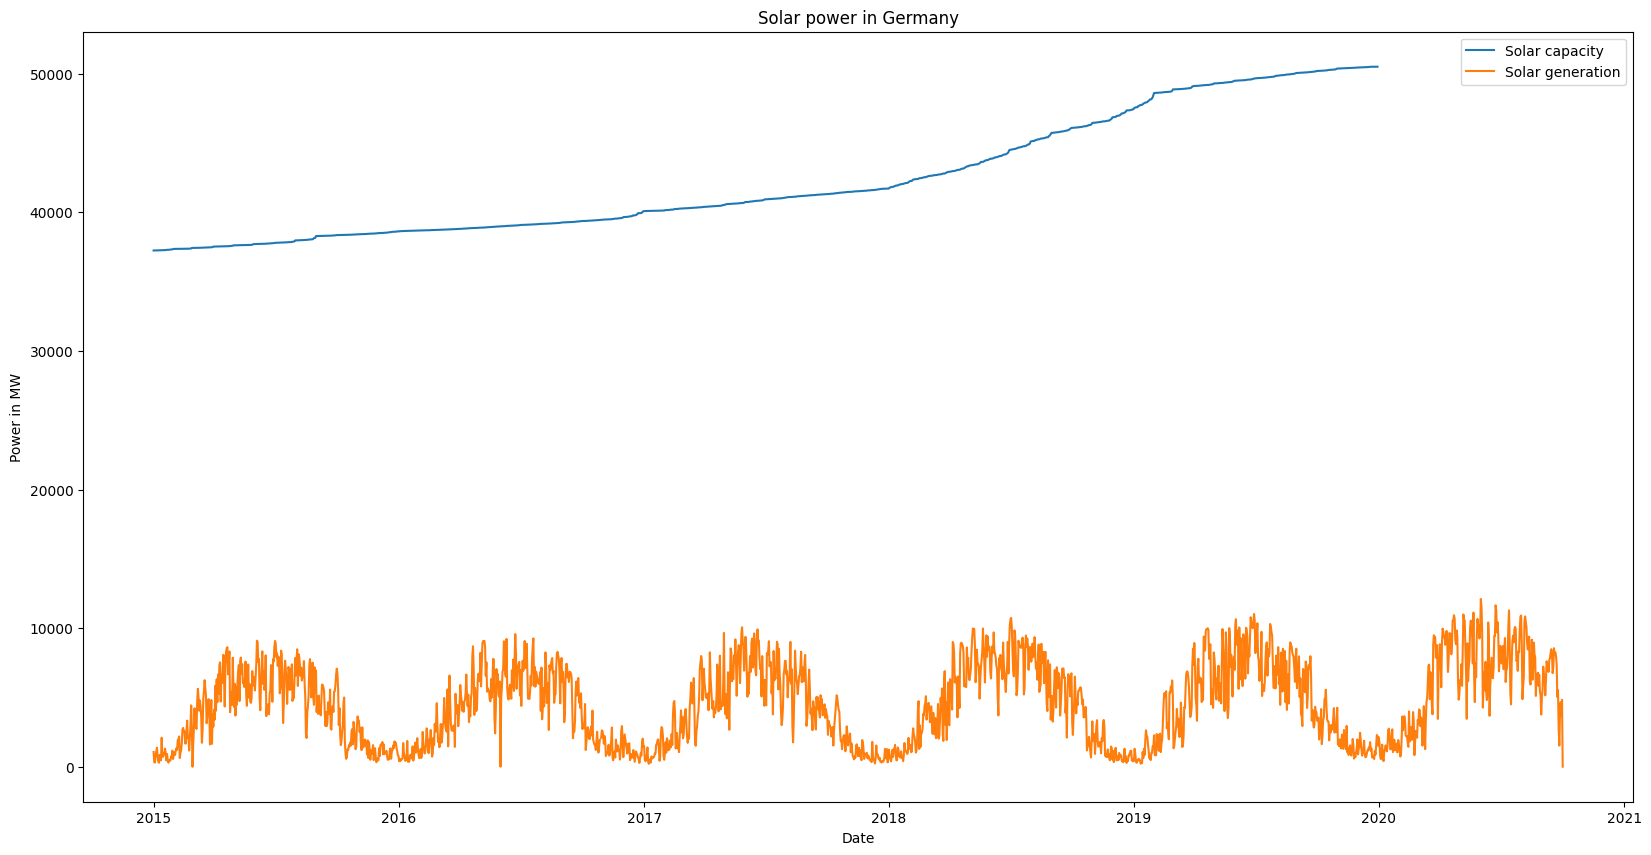

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(power_df["cet_cest_timestamp"], power_df["DE_solar_capacity"], label="Solar capacity")
plt.plot(power_df["cet_cest_timestamp"], power_df["DE_solar_generation_actual"], label="Solar generation")
plt.xlabel("Date")
plt.ylabel("Power in MW")
plt.title("Solar power in Germany")
plt.legend()
plt.show()

### Cloud data

In [55]:
import pandas as pd

cloud_df = pd.read_sql_table("cloud_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Replace illegal values with NA
cloud_df.replace(-999, pd.NA, inplace=True)

# Remove hours and minutes from data -> we are only interested in the day
cloud_df["date"] = cloud_df["date"].dt.date

# Group by date and calculate the average of the cloud cover
cloud_df = cloud_df.groupby("date")[["cloud_cover"]].mean().reset_index()

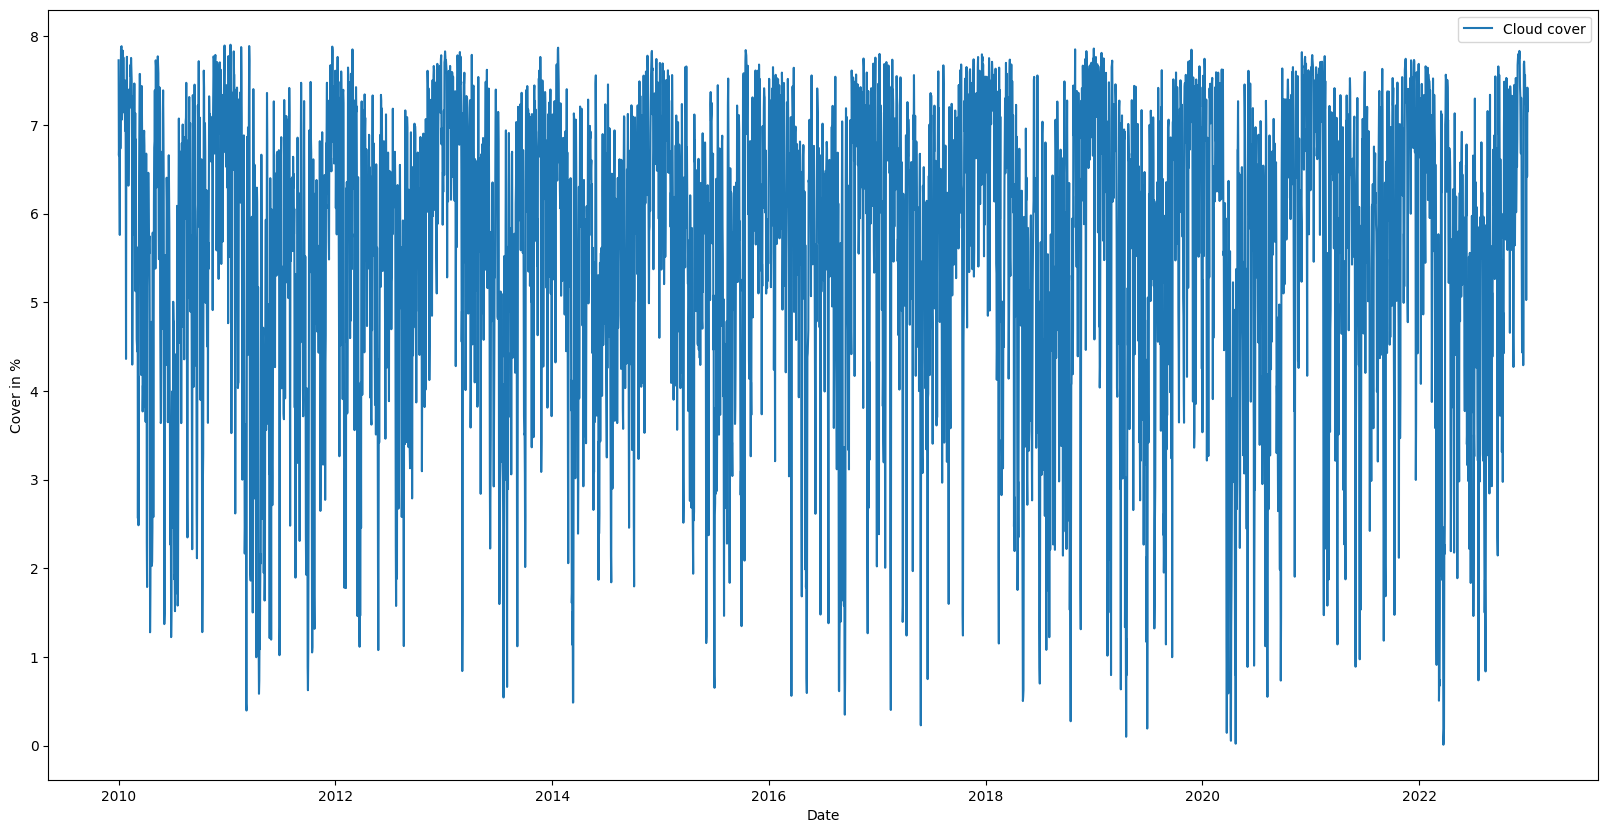

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(cloud_df["date"], cloud_df["cloud_cover"], label="Cloud cover")
plt.xlabel("Date")
plt.ylabel("Cover in %")
plt.legend()
plt.show()

### Rain data

In [57]:
rain_df = pd.read_sql_table("rain_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Replace illegal values with NA
rain_df.replace(-999, pd.NA, inplace=True)

# Remove hours and minutes from data -> we are only interested in the day
rain_df["date"] = rain_df["date"].dt.date

# Remove bad data
drop_codes = {
    4: pd.NA,  # Form of precipitation not known, although precipitation reported
    9: pd.NA,  # Misidentification; missing value or precipitation form not detectable with automatic measurement
}
rain_df["rain_form"] = rain_df["rain_form"].replace(drop_codes)

# Aggregate data
def mode_without_zero(x):
    x = x[x != 0]
    return x.mode() if not x.empty else pd.NA

aggregations = {
    "rain": "mean",
    "rain_form": mode_without_zero,
    "snow_height": "mean",
    "new_snow_height": "mean",
}

# Group by date and calculate the average precipitation
rain_df = rain_df.groupby("date").agg(aggregations).reset_index()

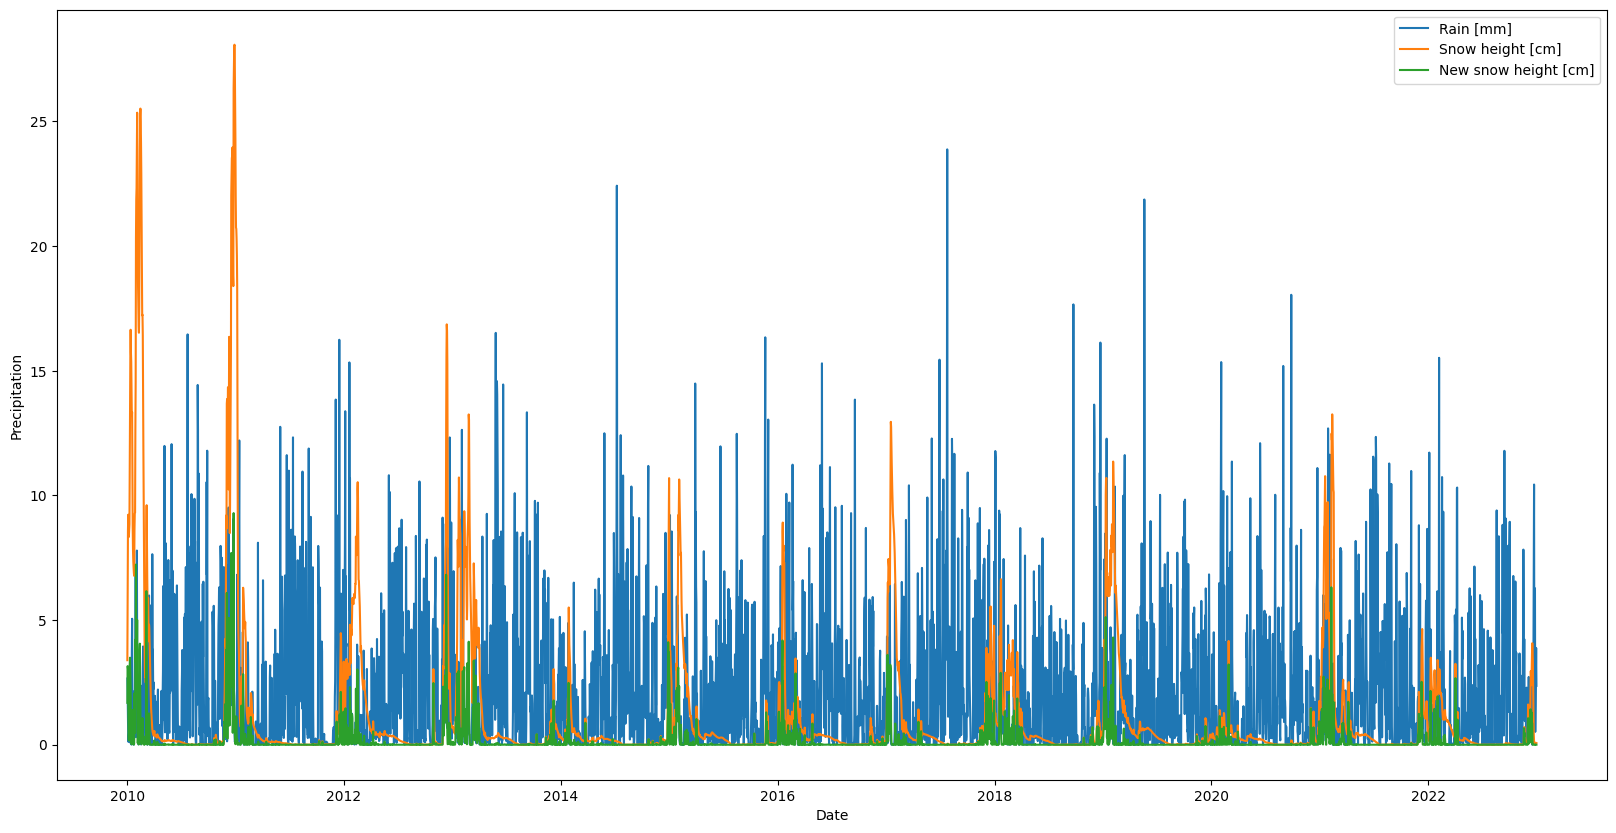

In [58]:
plt.figure(figsize=(20, 10))
plt.plot(rain_df["date"], rain_df["rain"], label="Rain [mm]")
plt.plot(rain_df["date"], rain_df["snow_height"], label="Snow height [cm]")
plt.plot(rain_df["date"], rain_df["new_snow_height"], label="New snow height [cm]")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.legend()
plt.show()

### Temperature data

In [59]:
temperature_df = pd.read_sql_table("temperature_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Replace illegal values with NA
temperature_df.replace(-999, pd.NA, inplace=True)

# Remove hours and minutes from data -> we are only interested in the day
temperature_df["date"] = temperature_df["date"].dt.date

# Group by date and calculate the average temperature in Germany
temperature_df = temperature_df.groupby("date")[["temperature", "humidity"]].mean().reset_index()

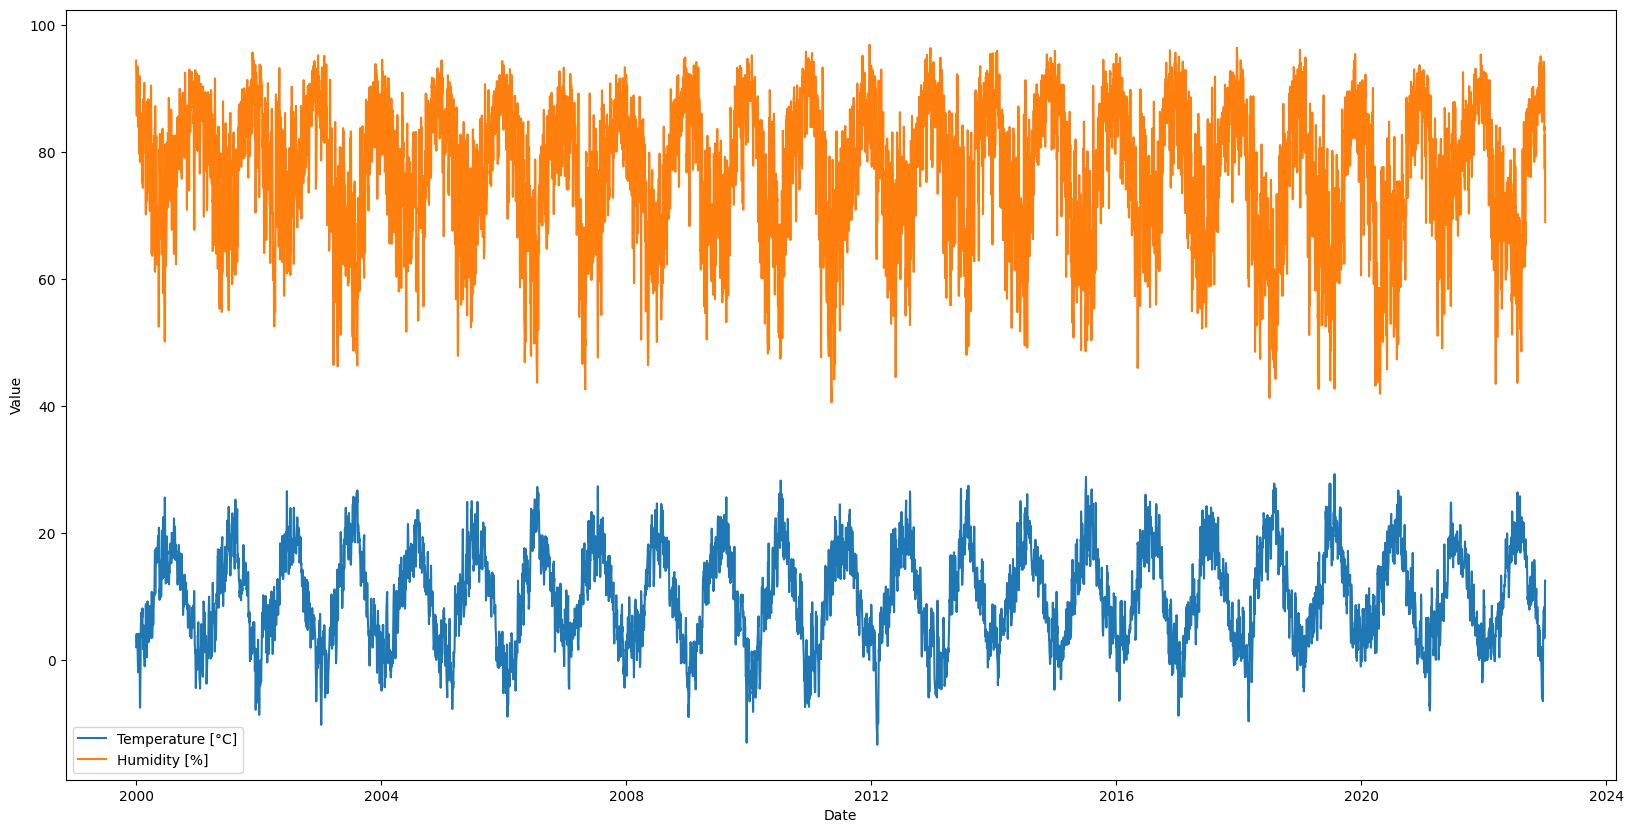

In [60]:
plt.figure(figsize=(20, 10))
plt.plot(temperature_df["date"], temperature_df["temperature"], label="Temperature [°C]")
plt.plot(temperature_df["date"], temperature_df["humidity"], label="Humidity [%]")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

### Wind data

In [61]:
wind_df = pd.read_sql_table("wind_data", "sqlite:///data/processed_data/transformed_data.sqlite")

# Replace illegal values with NA
wind_df.replace(-999, pd.NA, inplace=True)

# Remove hours and minutes from data -> we are only interested in the day
wind_df["date"] = wind_df["date"].dt.date

# Group by date and calculate the average wind speed in Germany
wind_df = wind_df.groupby("date")[["speed"]].mean().reset_index()

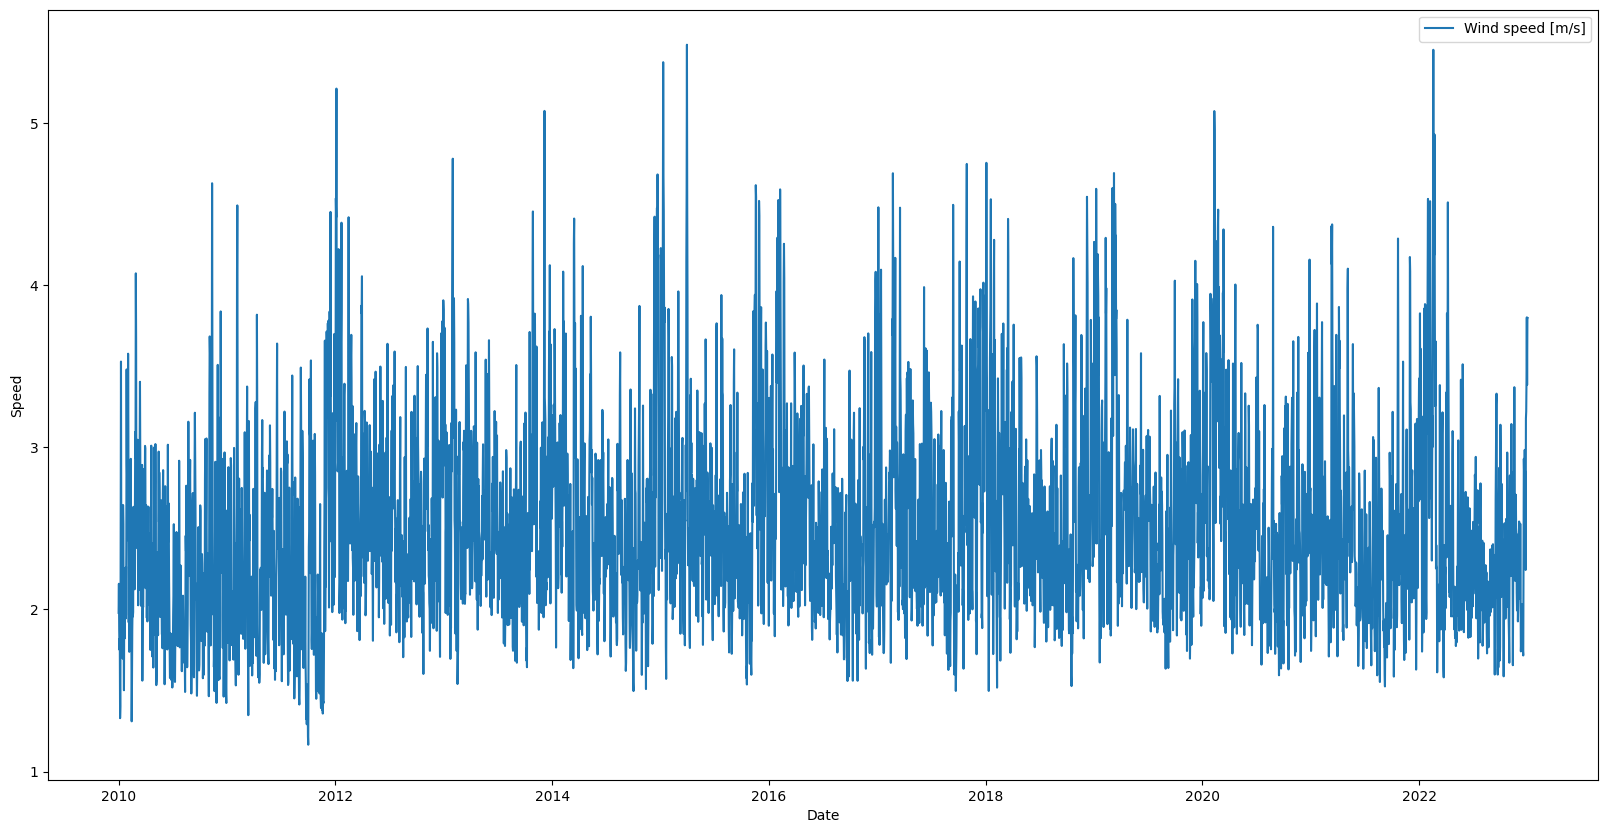

In [62]:
plt.figure(figsize=(20, 10))
plt.plot(wind_df["date"], wind_df["speed"], label="Wind speed [m/s]")
plt.xlabel("Date")
plt.ylabel("Speed")
plt.legend()
plt.show()